In [1]:
import glob
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import os,sys

In [2]:
import cv2
from PIL import Image

In [3]:
def bbox_voc2yolo(bx, w, h):
    x1 = bx[0]
    y1 = bx[1]
    x2 = bx[2]
    y2 = bx[3]
    w_bbox = x2 - x1
    h_bbox = y2 - y1
    x_c = x1 + w_bbox/2
    y_c = y1 + h_bbox/2
    bbox = [x_c/w, y_c/h, w_bbox/w, h_bbox/h]
    return bbox

def bbox_yolo2voc(bx, w, h):
    x_c = float(bx[0])*w
    y_c = float(bx[1])*h
    wbbox = float(bx[2])*w
    hbbox = float(bx[3])*h
    x1 = int(x_c - wbbox/2)
    y1 = int(y_c - hbbox/2)
    x2 = int(x_c + wbbox/2)
    y2 = int(y_c + hbbox/2)
    bbox = [x1, y1, x2, y2]
    return bbox

def bbox_coco2voc(bbox):
    # bbox[0] = bbox[0] - bbox[2]/2
    # bbox[1] = bbox[1] - bbox[3]/2
    bbox[2] = bbox[0] + bbox[2]
    bbox[3] = bbox[1] + bbox[3]
    return bbox

In [4]:
def draw_bbox(img_np, box_coco):
    id_ = box_coco[0]
    if not isinstance(id_, str):
        id_ = int(id_)
    x1 = int(box_coco[1])
    y1 = int(box_coco[2])
    x2 = int(box_coco[3])
    y2 = int(box_coco[4])
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.rectangle(img_np,(x1, y1),(x2, y2),(0,0,255),thickness=2)
    f = cv2.putText(img_np, text=str(id_), org=(x1 + 5, y1 + 5), fontFace=font, fontScale=0.7, 
        thickness=2, lineType=cv2.LINE_AA, color=(0, 255, 0))
    return img_np

In [5]:
def read_bboxes(txtp):
    with open(txtp, 'r') as f:
        txt = f.readlines()
    return txt

def get_bboxes_text(txtp):
    import re
    tx_str = read_bboxes(txtp)
    bboxes = []
    for line in tx_str:
        line_list = re.split(r'[\s\n\t]',line)
        bx = []
        bx.append(int(line_list[0]))
        for item in line_list[1:]:
            if len(item.strip())>0:
                bx.append(float(item))
        bboxes.append(bx)
    return bboxes

In [6]:
def copy_data(plist, mode='copy'):
    ps = plist[0]
    pt = plist[1]
    shutil.copyfile(ps, pt)
    
def write_txt(input_list):
    label_path, text = input_list[0], input_list[1]
    with open(label_path, 'a+') as f:
        f.write(text)

In [7]:
# label_1_map = {'其他': -1, '腰带': 0, '帽子': 1, '鞋子': 2, '包': 3, '上装': 4, '裤子': 5, '裙子': 6, '连体装': 7}
label_1_map = {'其他': -1, '腰带': 0, '帽子': 1, '鞋子': 2, '包': 3, '上装': 4, '裤子': 5, '裙子': 6, '连体装': 7}

In [269]:
l2_map_l1 = {23: 2,
 24: 2, 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 3,
 43: 2,
 0: 4,
 1: 4,
 2: 4,
 3: 4,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 4,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 4,
 14: 4,
 15: 6,
 16: 5,
 17: 5,
 18: 5,
 19: 5,
 20: 5,
 21: 7,
 22: 7,
 36: 4,
 37: 4,
 38: 4,
 39: 4,
 40: 4,
 41: 4,
 42: 4,
43: 2}

In [2]:
import glob

In [11]:
img = glob.glob('/home/chenyi/workspace/dataset/gallery_detect/clothes/gallery_crop0/crops/*/*.jpg')

In [12]:
len(img)

45416

In [8]:
label_2_map = {
    '其他': -1,
    
    # 上装
    '小西装': 0, '毛衣/绒衣/针织衫': 1, '女衫类': 2, '皮衣': 3, '夹克/外套': 4, '风衣': 5, '马甲/背心': 6, '吊带': 7, '牛仔': 8, '羽绒服': 9, '大衣': 10, '皮草': 11, '卫衣': 12, '棉衣/羊羔绒': 13, '斗篷': 14,
    
    # 裙子
    '裙子': 15,
    
    # 裤子
    '西装裤': 16, '牛仔裤': 17, '休闲裤': 18, '打底裤': 19, '运动裤': 20,
    
    # 连体装
    '连衣裙': 21, '连衣裤': 22,
    # 包
    '包': 23,
    
    # 鞋子
    '正装女鞋': 24, '休闲鞋': 25,
}

In [653]:
names = {0: ['小西装', 'Suit_xizhuang'],  
 1: ['毛衣/绒衣/针织衫', 'Sweater/knit'],   
 2: ['女衫类', 'Blouses'],   
 3: ['皮衣外套', 'Leather coat'],   
 4: ['夹克外套', 'Jacket/coat '],    
 5: ['风衣', 'dust coat'],    
 6: ['背心', 'vest'],    
 7: ['吊带', 'harness'],    
 8: ['牛仔外套', 'Denim jacket'],    
 9: ['羽绒服', 'Down jacket'],    
 10: ['大衣', 'coat'],   
 11: ['皮草', 'fur'],    
 12: ['卫衣', 'fleece'],     
 13: ['棉衣/羊羔绒', 'Padded coat'],    
 14: ['斗篷', 'cloak'],    
 15: ['半身裙', 'skirt'],
 16: ['西装裤', 'Suit pants'],    
 17: ['牛仔裤', 'Jeans'],     
 18: ['休闲裤', 'Slacks'],      
 19: ['打底裤', 'Leggings'],    
 20: ['运动裤', 'Sweatpants'],
21: ['连衣裙', 'Dress'],     
 22: ['连衣裤', 'Jumpsuit'],    
 23: ['正装女鞋', 'Suits shoes'],   
 24: ['帆布鞋', 'Canvas shoes'],     
 25: ['松糕鞋', 'Platform shoes'],    
 26: ['洞洞鞋', 'Hole shoes'],     
 27: ['懒人鞋', 'Lazy shoes'],     
 28: ['板鞋', 'board shoes'],    
 29: ['拖鞋', 'slippers'],     
 30: ['凉鞋', 'sandals'],    
 31: ['运动鞋', 'Sports shoes'],    
 32: ['雪地靴', 'Ugg boots'],   
 33: ['豆豆鞋', 'Doug shoes'],    
 34: ['网鞋', 'Net shoes'],      
35: ['包', 'bag'],   
36:['衬衫', 'shirt'],  
37:['T恤', 'T-shirt'],
38:['POLO衫','POLO shirt'],
39:['马甲', 'Vest'] ,
40:['棒球服', 'Baseball uniform'], 
41:['抹胸', 'Bandeau'],
42:['皮裤','Leather pants'],
43:['休闲鞋','Leisure shoes'],
44:['帽子','Hat'],}

In [654]:
eng2chi = {}
for k,v in names.items():
    eng2chi[v[1]] = v[0]
    # print(v)
    # break

eng2num = {}
for k,v in names.items():
    eng2num[v[1]] = k
    # break

### 转yolo

In [11]:
def get_yolo_bbox(row):
    w,h = row['width'], row['height']
    bbox = row.loc[[ 'xmin','ymin', 'xmax', 'ymax']].values
    bbox = bbox_voc2yolo(bbox, w, h)
    bboxes_list.append(bbox)

In [12]:
# %%time
# df = hw_df
# bboxes_list = []
# _ = df.apply(lambda row: get_yolo_bbox(row), axis=1)

In [13]:
# col_name = 'xmin'
# ind = 0
# df[col_name] = [x[ind] for x in bboxes_list]

In [ ]:
!ls /nas/chenyi/datasets_nas/openfashion

In [ ]:
dp23 = pd.read_csv('/nas/chenyi/datasets_nas/openfashion/deepedia2/deepedia_catg23_yolo.csv')

In [ ]:
dp23.head()

In [ ]:
dp23.describe()

In [ ]:
dp23.value_counts('source')

In [ ]:
dp23[dp23['source']==dp23.value_counts('source').axes[0][0]].describe()

In [ ]:
opf = pd.read_csv('/nas/chenyi/datasets_nas/openfashion/openfashion45_coco.csv')

In [ ]:
# /nas/chenyi/datasets_nas/openfashion/openfashion_info.csv

In [ ]:
opf.head()

In [ ]:
len(opf)

In [ ]:
opf.value_counts('source')

In [ ]:
opf.value_counts('source').axes[0][0]

In [ ]:
opf.describe()

In [ ]:
opf[opf['source']==opf.value_counts('source').axes[0][0]].describe()

In [ ]:
opf[opf['source']==opf.value_counts('source').axes[0][1]].describe()

In [ ]:
opf[opf['source']==opf.value_counts('source').axes[0][2]].describe()

In [ ]:
fp_df = opf[opf['source']==opf.value_counts('source').axes[0][2]]

In [ ]:
opf.columns

In [ ]:
dp23.loc[dp23[dp23['source']==dp23.value_counts('source').axes[0][1]].index, ['x_1', 'y_1', 'x_2', 'y_2', 'path']].head(2).values

In [ ]:
opf.loc[opf[opf['source']==opf.value_counts('source').axes[0][2]].index, ['xmin', 'ymin', 'xmax', 'ymax', 'path']].head(2).values

In [ ]:
# opf.loc[opf[opf['source']==opf.value_counts('source').axes[0][2]].index, ['xmin', 'ymin', 'xmax', 'ymax', 'path']] = dp23.loc[dp23[dp23['source']==dp23.value_counts('source').axes[0][1]].index, ['x_1', 'y_1', 'x_2', 'y_2', 'path']].values

In [ ]:
opf = pd.read_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/openfashion45_data_clear.csv')

In [ ]:
# opf.loc[opf[opf['source']==opf.value_counts('source').axes[0][2]].index, ['xmin']] = \
#             opf.loc[opf[opf['source']==opf.value_counts('source').axes[0][2]].index, ['xmin']].values* opf.loc[opf[opf['source']==opf.value_counts('source').axes[0][2]].index, ['width']].values

In [ ]:
opf.loc[:, ['ymin']] = \
            opf.loc[:, ['ymin']].values/ opf.loc[:, ['height']].values

In [ ]:
opf[opf['source']==opf.value_counts('source').axes[0][2]].head(2)

In [ ]:
opf.describe()

In [ ]:
# opf.to_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/openfashion45_data_clear.csv', index=False)

### 数据分析

In [10]:
!ls /nas/chenyi/datasets_nas/openfashion/allfashion/

del_df_temp0511.csv  openfashion31_clr_temp.csv  openfashion45_bbox_yolo.csv
del_df_temp.csv      openfashion43_clear.csv	 openfashion45_data_clear.csv


In [286]:
ofashion43 = pd.read_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/openfashion45_data_clear.csv')

/tmp/ipykernel_2871/1613460321.py:1: DtypeWarning: Columns (3,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ofashion43 = pd.read_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/openfashion45_data_clear.csv')


In [287]:
# ofashion43_clr.to_csv('/nas/chenyi/datasets_nas/openfashion/openfashion43_clr.csv', index=False)

In [288]:
ofashion43.tail(2)

,source,path,label2_eng,label1_chi,label43,label2_chi,xmin,ymin,xmax,ymax,height,width,fname,mode,len
330520,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.515455,0.854048,37.0,98.0,877,550,20150327124301904,train,4
330521,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.680000,0.932155,40.0,111.0,877,550,20150327124301904,train,4


In [289]:
ofashion43.describe()

,label43,xmin,ymin,xmax,ymax,height,width,len
count,330522.000000,330522.000000,330522.000000,330522.000000,330522.000000,330522.000000,330522.000000,330522.000000
mean,17.377572,0.497446,0.590356,223.852098,325.209296,872.187519,641.996130,2.689757
std,9.186971,0.088485,0.196077,147.700537,211.692392,364.742707,251.633003,1.721888
min,0.000000,0.029333,0.025000,3.000000,4.000000,71.000000,68.000000,1.000000
25%,12.000000,0.458560,0.441895,108.000000,157.000000,631.000000,468.000000,1.000000
50%,21.000000,0.498932,0.561379,199.000000,291.000000,832.000000,640.000000,2.000000
75%,23.000000,0.537500,0.715870,307.000000,448.000000,1024.000000,750.000000,4.000000
max,44.000000,0.995528,0.990469,2038.000000,3310.000000,6286.000000,4195.000000,21.000000


In [290]:
len(ofashion43)

330522

In [291]:
# ofashion43_coco = ofashion43
# ofashion43_coco['xmin'] = ofashion43_coco['xmin']*ofashion43_coco['width']
# ofashion43_coco['ymin'] = ofashion43_coco['ymin']*ofashion43_coco['height']
# ofashion43_coco['xmax'] = ofashion43_coco['xmax']*ofashion43_coco['width']
# ofashion43_coco['ymax'] = ofashion43_coco['ymax']*ofashion43_coco['height']
# ofashion43 = ofashion43_coco

In [294]:
ofashion43['label43'].max()

43

In [293]:
ofashion43 = ofashion43[ofashion43['label43']<=43]

### 数据清洗

In [374]:
hw_df  = ofashion43[ofashion43['source']=='haowei34k']

In [ ]:
hw_df['label8'] = hw_df['label43'].apply(lambda x: l2_map_l1[x])

In [297]:
hw_df.head(2)

,source,path,label2_eng,label1_chi,label43,label2_chi,xmin,ymin,xmax,ymax,height,width,fname,mode,len,label8
186400,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.453096,0.783125,33.0,85.0,800,533,20160425101358677,train,4,2
186401,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.526266,0.900000,49.0,96.0,800,533,20160425101358677,train,4,2


In [300]:
label_1_map

{'其他': -1,
 '腰带': 0,
 '帽子': 1,
 '鞋子': 2,
 '包': 3,
 '上装': 4,
 '裤子': 5,
 '裙子': 6,
 '连体装': 7}

In [1732]:
catg = 4
catg_df = hw_df[hw_df['label8']==catg]

In [321]:
catg_df.describe()

,label43,xmin,ymin,xmax,ymax,height,width,len,label8
count,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.0
mean,6.872497,0.500976,0.374835,232.930586,297.690189,954.679704,653.292405,4.486491,4.0
std,10.375749,0.051588,0.073231,130.323983,174.173215,519.898499,356.939787,0.773367,0.0
min,0.000000,0.048864,0.101266,22.000000,39.000000,214.000000,173.000000,1.000000,4.0
25%,1.000000,0.476049,0.327313,157.000000,198.000000,654.000000,450.000000,4.000000,4.0
50%,3.000000,0.500000,0.361111,201.000000,257.000000,855.000000,599.000000,5.000000,4.0
75%,8.000000,0.524620,0.407076,260.000000,336.000000,1000.000000,748.000000,5.000000,4.0
max,42.000000,0.970000,0.952604,2038.000000,3310.000000,6286.000000,4195.000000,21.000000,4.0


##### BBOX大小核对

In [117]:
thred = 0.05
catg_df_temp = catg_df[((catg_df['xmin']<thred) | (catg_df['ymin']<thred) | 
                     (catg_df['xmin']>1-thred) | (catg_df['ymin']>1-thred)) & 
                    (catg_df['len']==2)]

In [ ]:
bbox_dirty = pd.concat([bbox_dirty, ofashion43_small], axis=0)

In [ ]:
bbox_dirty.describe()

In [ ]:
len(bbox_dirty.drop_duplicates('path'))

In [ ]:
img_drop_df = bbox_dirty.drop_duplicates('path')

In [ ]:
ofashion31_clr_temp = ofashion43_big[~ofashion43_big['path'].isin(img_drop_df['path'])]

In [ ]:
len(ofashion31_clr_temp)

In [ ]:
len(ofashion31_clr_temp.drop_duplicates('path'))

In [ ]:
ofashion31_clr_temp.describe()

In [ ]:
ofashion31_clr_temp.drop_duplicates('path').value_counts('source')

In [1602]:
ofashion31_clr = pd.read_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/openfashion31_clr_temp.csv')

/tmp/ipykernel_238968/3092985983.py:1: DtypeWarning: Columns (3,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ofashion31_clr = pd.read_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/openfashion31_clr_temp.csv')


In [1603]:
ofashion31_clr.head()

,source,path,label2_eng,label1_chi,label43,label2_chi,xmin,ymin,xmax,ymax,height,width,fname,mode,len
0,DeepFashion2,/home/chenyi/workspace/dataset/data/DeepFashio...,long sleeve dress,连体装,21,连衣裙,0.500000,0.530649,466.0,779.0,832,468,3,NaN,1
1,DeepFashion2,/home/chenyi/workspace/dataset/data/DeepFashio...,long sleeve dress,连体装,21,连衣裙,0.498932,0.589744,467.0,510.0,624,468,4,NaN,1
2,DeepFashion2,/home/chenyi/workspace/dataset/data/DeepFashio...,long sleeve dress,连体装,21,连衣裙,0.500000,0.548077,466.0,716.0,832,468,5,NaN,1
3,DeepFashion2,/home/chenyi/workspace/dataset/data/DeepFashio...,long sleeve dress,连体装,21,连衣裙,0.497863,0.694111,466.0,507.0,832,468,6,NaN,1
4,DeepFashion2,/home/chenyi/workspace/dataset/data/DeepFashio...,long sleeve dress,连体装,21,连衣裙,0.483974,0.571225,407.0,590.0,702,468,7,NaN,1


##### CHECK Area

In [372]:
%%time
# 计算bbox的面积
df = ofashion43
area_list = []
for ind,row in tqdm(df.iterrows()):
    whWH = row.loc[['xmax', 'ymax']].values
    area  = 1
    for item in whWH:
        area *= item
    area_list.append(area)
    # break

330366it [00:45, 7298.51it/s]

CPU times: user 45.3 s, sys: 25.9 ms, total: 45.4 s
Wall time: 45.3 s


In [373]:
ofashion43['area'] = area_list

##### bbox的个数

In [ ]:
# %%time
# 计算bbox的个数
# ofashion43['len'] = 0
# for ind,p_ in tqdm(enumerate(pcounter.index)):
#     num = pcounter.values[ind]
#     ofashion43.loc[ofashion43[ofashion43['path'] == p_].index, 'len'] = num

In [1626]:
len(ofashion31_clr.value_counts('label43'))

23

In [1647]:
ofashion31_clr.value_counts('label43').sort_index()

label43
0      2252
1      8719
2      8688
3      1558
4     27671
5       331
6     19446
7      2598
8       911
9       169
10     1046
11      273
12     1304
13      294
14       26
15    46741
16      952
17     5692
18     7268
19      808
20      143
21    82355
22     1303
dtype: int64

In [236]:
hw_df[hw_df['len']==1].value_counts('label8').sort_index()

label8
4     11
7    135
dtype: int64

In [1637]:
dp_df = ofashion31_clr[~(ofashion31_clr['source'] == 'haowei34k')]
dp_len1 = dp_df[dp_df['len']==1]

In [1654]:
num2eng[1]

'Sweater/knit'

In [1648]:
dp_len1.value_counts('label43').sort_index()

label43
1      1316
2      2111
4     17048
6     11605
7      1627
15    30061
21    68944
22      619
dtype: int64

In [1640]:
len(dp_len1)

133331

In [1638]:
ofashion31_clr_temp = ofashion31_clr[~ofashion31_clr['path'].isin(dp_len1['path'])]

In [1641]:
len(ofashion31_clr_temp)

87217

In [1642]:
ofashion31_clr_temp.to_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/openfashion31_clr_temp.csv', index=False)

##### 类别均衡

In [21]:
len(hw_df)

143623

In [22]:
counter_hw = hw_df.value_counts('label43')

In [23]:
hw_df.head(2)

,source,path,label2_eng,label1_chi,label43,label2_chi,xmin,ymin,xmax,ymax,height,width,fname,mode,len
186400,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.453096,0.783125,33.0,85.0,800,533,20160425101358677,train,4
186401,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.526266,0.900000,49.0,96.0,800,533,20160425101358677,train,4


In [57]:
counter_index = counter_hw[(counter_hw.values<7000) & (counter_hw.values>500)].index.tolist()

In [58]:
hw_stay3000_df = hw_df[hw_df['label43'].isin(counter_index)]

In [59]:
hw_stay_df = hw_df[hw_df['path'].isin(hw_stay3000_df['path'])]

In [60]:
len(hw_stay3000_df), len(hw_stay_df), len(hw_stay3000_df.drop_duplicates('path')), len(hw_df.drop_duplicates('path'))

(51972, 124405, 28970, 33411)

In [61]:
counter_stay = hw_stay_df.value_counts('label43')

In [62]:
counter_hw[(counter_hw.values>5000)], len(counter_hw)

(label43
 23    44481
 35    20515
 18     8833
 15     7625
 1      7225
 21     6941
 17     6875
 dtype: int64,
 43)

In [63]:
counter_stay[counter_stay.values>3000], len(counter_stay)

(label43
 23    36639
 35    17824
 21     6941
 17     6875
 18     6842
 15     5505
 2      4035
 24     3767
 1      3748
 30     3225
 dtype: int64,
 43)

In [68]:
len(hw_stay_df[hw_stay_df['len']==1])

133

In [69]:
hw_stay_df[hw_stay_df['len']==1].value_counts('label43')

label43
21    129
10      3
2       1
dtype: int64

In [71]:
names[3]

['皮衣外套', 'Leather coat']

In [44]:
hw_stay_df

,source,path,label2_eng,label1_chi,label43,label2_chi,xmin,ymin,xmax,ymax,height,width,fname,mode,len
186404,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Denim jacket,NaN,8,牛仔外套,0.596000,0.402924,298.0,459.0,1334,1000,20170818201332676,train,5
186405,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Leggings,NaN,19,打底裤,0.624000,0.632684,246.0,460.0,1334,1000,20170818201332676,train,5
186406,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.723000,0.817091,82.0,166.0,1334,1000,20170818201332676,train,5
186407,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.589000,0.845952,102.0,175.0,1334,1000,20170818201332676,train,5
186408,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suit_xizhuang,NaN,0,小西装,0.520042,0.296160,171.0,173.0,677,474,20141231135447984,train,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330013,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,bag,NaN,35,包,0.402579,0.529566,54.0,212.0,761,698,20170915135023401,train,5
330019,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suit_xizhuang,NaN,0,小西装,0.476364,0.355758,198.0,274.0,877,550,20150327124301904,train,4
330020,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suit pants,NaN,16,西装裤,0.517273,0.654504,207.0,360.0,877,550,20150327124301904,train,4
330021,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.515455,0.854048,37.0,98.0,877,550,20150327124301904,train,4


In [185]:
len(counter_hw[(counter_hw.values>300)].axes[0]), len(counter_stay[(counter_stay.values>300)].axes[0])

(35, 35)

In [ ]:

of_cls_df = ofashion43[ofashion43['label43']>0]

### Display

In [ ]:
hw_df = ofashion43[ofashion43['source']=='haowei34k']

In [ ]:
hw_df.describe()

In [ ]:
df = df[df['source']=='Fashionpedia']

In [ ]:
def bbox_coco2voc(bbox):
    # bbox[0] = bbox[0] - bbox[2]/2
    # bbox[1] = bbox[1] - bbox[3]/2
    bbox[2] = bbox[0] + bbox[2]
    bbox[3] = bbox[1] + bbox[3]
    return bbox

In [ ]:
p = df.iloc[300,1]

In [ ]:
df.head(3)

In [ ]:
x

In [ ]:
bboxes = []
x = df[df['path']==p]
for ind, row in x.iterrows():
    bbox = row.loc[['label_2', 'x_1','y_1', 'x_2', 'y_2']].values.tolist()
    # bbox[1:] = bbox_coco2voc(bbox[1:])
    # bbox[0] = row['label2_eng']
    bboxes.append(bbox)

In [ ]:
# bboxes = []
# x = df[df['path']==p]
# for ind, row in x.iterrows():
#     bbox = row.loc[['label43', 'xmin','ymin', 'xmax', 'ymax']].values.tolist()
#     bbox[1:] = bbox_coco2voc(bbox[1:])
#     bbox[0] = row['label2_eng']
#     bboxes.append(bbox)

In [ ]:
img_np = cv2.imread(str(p))
img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
h = img_np.shape[0]
w = img_np.shape[1]
for bx in bboxes:
    bx[1:] = bbox_coco2voc(bx[1:])
    draw_bbox(img_np, bx)

In [ ]:
bboxes

In [ ]:
Image.fromarray(img_np)

#### Pandas画图

In [ ]:
ofashion43_small.head()

In [ ]:
df = ofashion43_small
i = 1100

In [ ]:
ind = df.index[i]
p = df.loc[ind]['path']
bboxes = [df.loc[ind][['label43', 'xmin','ymin', 'xmax', 'ymax']].values.tolist()]
id_ = df.loc[ind, 'label2_eng']
df.loc[ind, 'source']

In [ ]:
img_np = cv2.imread(str(p))
img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
h = img_np.shape[0]
w = img_np.shape[1]
for bx in bboxes:
    bx[0] = id_
    bx[1:] = bbox_coco2voc(bx[1:])
    draw_bbox(img_np, bx)

In [ ]:
Image.fromarray(img_np)

### Display HTML

In [1733]:
catg_df.describe()

,label43,xmin,ymin,xmax,ymax,height,width,len,area,label8
count,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,2.861100e+04,28611.0
mean,6.872497,0.500976,0.374835,232.930586,297.690189,954.679704,653.292405,4.486491,8.894409e+04,4.0
std,10.375749,0.051588,0.073231,130.323983,174.173215,519.898499,356.939787,0.773367,1.541633e+05,0.0
min,0.000000,0.048864,0.101266,22.000000,39.000000,214.000000,173.000000,1.000000,1.134000e+03,4.0
25%,1.000000,0.476049,0.327313,157.000000,198.000000,654.000000,450.000000,4.000000,3.198000e+04,4.0
50%,3.000000,0.500000,0.361111,201.000000,257.000000,855.000000,599.000000,5.000000,5.170000e+04,4.0
75%,8.000000,0.524620,0.407076,260.000000,336.000000,1000.000000,748.000000,5.000000,8.472400e+04,4.0
max,42.000000,0.970000,0.952604,2038.000000,3310.000000,6286.000000,4195.000000,21.000000,6.745780e+06,4.0


In [323]:
# thred = 0.05
# dis_df = ofashion43[((catg_df['xmin']<thred) | (catg_df['ymin']<thred) | 
#                      (catg_df['xmin']>1-thred) | (catg_df['ymin']>1-thred)) & 
#                     (catg_df['len']==2)]

In [324]:
# dis_df = catg_df[(hwcatg_df_df['height']<250) | (catg_df['width']<180)]
# len(dis_df)

{'其他': -1,
 '腰带': 0,
 '帽子': 1,
 '鞋子': 2,
 '包': 3,
 '上装': 4,
 '裤子': 5,
 '裙子': 6,
 '连体装': 7}

In [635]:
hw_df[(hw_df['len']==2)].value_counts('label8')

label8
4    639
5    443
7    310
2    220
6    140
3     54
dtype: int64

In [451]:
hw_df[hw_df['label43']==21].describe()

,label43,xmin,ymin,xmax,ymax,height,width,len,area,label8
count,6941.0,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6.941000e+03,6941.0
mean,21.0,0.500073,0.455071,214.504538,428.811987,906.825385,617.114681,3.740527,1.163750e+05,7.0
std,0.0,0.051235,0.065743,117.397304,241.530862,454.094011,306.090401,0.908627,1.953199e+05,0.0
min,21.0,0.061856,0.186875,22.000000,40.000000,267.000000,187.000000,1.000000,8.800000e+02,7.0
25%,21.0,0.476589,0.406250,147.000000,282.000000,643.000000,448.000000,3.000000,4.288000e+04,7.0
50%,21.0,0.499375,0.442373,187.000000,376.000000,827.000000,585.000000,4.000000,7.079400e+04,7.0
75%,21.0,0.523214,0.493448,242.000000,490.000000,960.000000,650.000000,4.000000,1.148160e+05,7.0
max,21.0,0.930781,0.935897,1525.000000,3026.000000,6286.000000,4195.000000,16.000000,4.614650e+06,7.0


In [951]:
hw_df.head(2)

,source,path,label2_eng,label1_chi,label43,label2_chi,xmin,ymin,xmax,ymax,height,width,fname,mode,len,area,label8
186400,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.453096,0.783125,33.0,85.0,800,533,20160425101358677,train,4,2805.0,2
186401,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Suits shoes,NaN,23,正装女鞋,0.526266,0.900000,49.0,96.0,800,533,20160425101358677,train,4,4704.0,2


In [1103]:
label_1_map

{'其他': -1,
 '腰带': 0,
 '帽子': 1,
 '鞋子': 2,
 '包': 3,
 '上装': 4,
 '裤子': 5,
 '裙子': 6,
 '连体装': 7}

In [1640]:
hw_up_df = hw_df[hw_df['path'].isin(hw_df[hw_df['label43']==21]['path'].values.tolist())]
len(hw_up_df)

25823

In [1641]:
hw_df[hw_df['label8']==7].tail()

,source,path,label2_eng,label1_chi,label43,label2_chi,xmin,ymin,xmax,ymax,height,width,fname,mode,len,area,label8
330463,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Dress,NaN,21,连衣裙,0.453000,0.400000,173.0,314.0,750,500,20160422091354684,train,2,54322.0,7
330465,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Dress,NaN,21,连衣裙,0.426000,0.437333,178.0,348.0,750,500,20150105131432475,train,4,61944.0,7
330473,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Dress,NaN,21,连衣裙,0.489000,0.418367,199.0,339.0,833,500,20141204120909109,train,4,67461.0,7
330492,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Dress,NaN,21,连衣裙,0.524573,0.379808,131.0,208.0,624,468,20140511131830611,train,4,27248.0,7
330496,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Dress,NaN,21,连衣裙,0.546667,0.471451,180.0,253.0,648,600,20160227120931236,train,3,45540.0,7


In [1642]:
hw_up_df[(hw_up_df['len']==2)].value_counts('label43')

label43
21    288
23    158
35     44
30     21
29      9
8       8
3       7
4       7
1       6
2       4
10      4
31      3
11      3
0       2
12      2
6       2
24      1
25      1
27      1
28      1
17      1
18      1
dtype: int64

In [1643]:
# dis_df = hw_up_df[(hw_up_df['len']==2) & (hw_up_df['label8']==5)]
dis_df = hw_up_df[(hw_up_df['len']==2) & (hw_up_df['label8']==4)]

In [1644]:
dis_df.value_counts('label43')

label43
8     8
3     7
4     7
1     6
2     4
10    4
11    3
0     2
6     2
12    2
dtype: int64

In [1645]:
dis_img_df = dis_df.drop_duplicates('path').sort_values('len', ascending=False)

In [1646]:
len(dis_df), len(dis_img_df)

(45, 45)

In [1725]:
ind = 13
p = dis_img_df['path'].values[ind]
df_temp = ofashion43[ofashion43['path'] == p]
df_temp.loc[:,'xmax'] = df_temp.loc[:,'xmax'].values/df_temp.loc[:,'width'].values
df_temp.loc[:,'ymax'] = df_temp.loc[:,'ymax'].values/df_temp.loc[:,'height'].values
bboxes = df_temp.loc[:,['label2_eng', 'xmin', 'ymin', 'xmax', 'ymax']].values.tolist()
df_temp.loc[:,['source']].values[0]

/tmp/ipykernel_2871/62580736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.loc[:,'xmax'] = df_temp.loc[:,'xmax'].values/df_temp.loc[:,'width'].values
/tmp/ipykernel_2871/62580736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.loc[:,'ymax'] = df_temp.loc[:,'ymax'].values/df_temp.loc[:,'height'].values


array(['haowei34k'], dtype=object)

In [1726]:
ofashion43[ofashion43['path'] == p]

,source,path,label2_eng,label1_chi,label43,label2_chi,xmin,ymin,xmax,ymax,height,width,fname,mode,len,area
297843,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Denim jacket,NaN,8,牛仔外套,0.476010,0.427103,209.0,173.0,535,396,20160427175904587,train,2,36157.0
297844,haowei34k,/home/chenyi/workspace/dataset/data/haowei34k/...,Dress,NaN,21,连衣裙,0.527778,0.475701,126.0,205.0,535,396,20160427175904587,train,2,25830.0


In [1727]:
img_np = cv2.imread(str(p))
img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
h = img_np.shape[0]
w = img_np.shape[1]
for bx in bboxes:
    bx[1:] = bbox_yolo2voc(bx[1:], w, h)
    draw_bbox(img_np, bx)

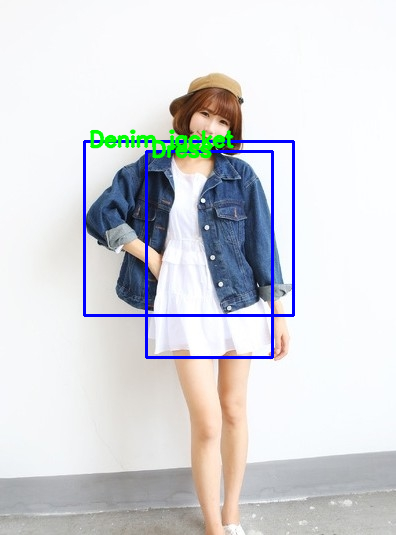

In [1728]:
Image.fromarray(img_np)

In [1717]:
eng2chi['Doug shoes'],eng2chi['Suits shoes'], eng2chi['Bandeau']

('豆豆鞋', '正装女鞋', '抹胸')

In [1718]:
eng2num['Slacks'],eng2num['Blouses']

(18, 2)

#### Recording Delete Dirty image by Dispalye

In [1172]:
# if 0:
#     del_df = pd.read_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/del_df_temp0511.csv')
#     p_del_list = del_df['path'].values.tolist()

In [1173]:
# del_df = pd.DataFrame()
# del_df['path'] = ''
# p_del_list = []

In [1174]:
# p_del_list.pop(0)

In [1719]:
p_del_list += dis_img_df['path'].values.tolist()

In [1720]:
len(p_del_list)

793

In [1721]:
p_del = p
p_del_list.append(p)
p_del_list = list(set(p_del_list))
len(p_del_list)

788

In [1722]:
del_df = pd.DataFrame()
del_df['path'] = ''
del_df['path'] = p_del_list

In [1723]:
del_df.tail().values, len(del_df)

(array([['/home/chenyi/workspace/dataset/data/haowei34k/images/train/20180613173849462.jpg'],
        ['/home/chenyi/workspace/dataset/data/haowei34k/images/train/20160413000406927.jpg'],
        ['/home/chenyi/workspace/dataset/data/haowei34k/images/train/20140314202703750.jpg'],
        ['/home/chenyi/workspace/dataset/data/haowei34k/images/val/20180116141008722.jpg'],
        ['/home/chenyi/workspace/dataset/data/haowei34k/images/train/20160424043256998.jpg']],
       dtype=object),
 788)

In [1724]:
if 1:
    del_df.to_csv('/nas/chenyi/datasets_nas/openfashion/allfashion/del_df_temp0511.csv', index=False)